## NBA API - Project 0

In [1]:
print("Let's begin!")

Let's begin!


In [2]:
import pandas as pd

from nba_api.stats.static import players

player_dict = players.get_players()

kd = [player for player in player_dict if player['full_name'] == 'Kevin Durant'][0]
kd_id = kd['id']
kd

{'id': 201142,
 'full_name': 'Kevin Durant',
 'first_name': 'Kevin',
 'last_name': 'Durant',
 'is_active': True}

In [3]:
from nba_api.stats.static import teams
team_dict = teams.get_teams()
PHX = [team for team in team_dict if team['full_name'] == 'Phoenix Suns'][0]
PHX_id = PHX['id']
PHX

{'id': 1610612756,
 'full_name': 'Phoenix Suns',
 'abbreviation': 'PHX',
 'nickname': 'Suns',
 'city': 'Phoenix',
 'state': 'Arizona',
 'year_founded': 1968}

In [4]:
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll

kd_gamelog = playergamelog.PlayerGameLog(player_id=kd_id, season = '2023')
kd_gamelog_df = kd_gamelog.get_data_frames()[0]

kd_gamelog_all = playergamelog.PlayerGameLog(player_id=kd_id, season = SeasonAll.all)
kd_gamelog_all_df = kd_gamelog_all.get_data_frames()[0]

kd_gamelog_df.head(10)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,201142,0022300554,"JAN 14, 2024",PHX @ POR,W,38,8,16,0.500,...,4,5,6,0,0,3,4,21,0,1
1,22023,201142,0022300531,"JAN 11, 2024",PHX @ LAL,W,32,7,12,0.583,...,5,5,5,3,1,1,0,18,15,1
2,22023,201142,0022300511,"JAN 08, 2024",PHX @ LAC,L,35,10,17,0.588,...,7,7,2,0,1,3,2,30,-14,1
3,22023,201142,0022300503,"JAN 07, 2024",PHX vs. MEM,L,36,11,23,0.478,...,8,10,5,0,1,1,1,23,-7,1
4,22023,201142,0022300450,"DEC 31, 2023",PHX vs. ORL,W,39,12,21,0.571,...,5,5,5,3,1,0,1,31,9,1
5,22023,201142,0022300436,"DEC 29, 2023",PHX vs. CHA,W,39,8,11,0.727,...,3,4,11,1,3,1,2,21,10,1
6,22023,201142,0022300418,"DEC 27, 2023",PHX @ HOU,W,41,9,16,0.563,...,10,10,16,2,1,3,2,27,17,1
7,22023,201142,0022300405,"DEC 25, 2023",PHX vs. DAL,L,43,4,11,0.364,...,7,8,7,0,1,6,2,16,-5,1
8,22023,201142,0022300387,"DEC 22, 2023",PHX @ SAC,L,34,9,14,0.643,...,7,7,2,1,0,7,0,28,-14,1
9,22023,201142,0022300363,"DEC 19, 2023",PHX @ POR,L,38,16,28,0.571,...,4,4,5,2,0,5,1,40,8,1


In [5]:
from nba_api.stats.endpoints import leaguegamefinder

# filtered on 23-24 season and PHX
PHX_games_df = leaguegamefinder.LeagueGameFinder(team_id_nullable=PHX_id, season_nullable = '2023-24').get_data_frames()[0]
PHX_games_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612756,PHX,Phoenix Suns,0022300554,2024-01-14,PHX @ POR,W,239,127,...,0.815,7,34,41,27,7,5,12,20,11.0
1,22023,1610612756,PHX,Phoenix Suns,0022300531,2024-01-11,PHX @ LAL,W,241,127,...,0.913,13,33,46,23,12,3,12,16,18.0
2,22023,1610612756,PHX,Phoenix Suns,0022300511,2024-01-08,PHX @ LAC,L,240,111,...,0.862,5,20,25,17,6,4,14,20,-27.6
3,22023,1610612756,PHX,Phoenix Suns,0022300503,2024-01-07,PHX vs. MEM,L,238,115,...,0.682,16,34,50,29,5,6,12,27,-4.2
4,22023,1610612756,PHX,Phoenix Suns,0022300489,2024-01-05,PHX vs. MIA,W,240,113,...,0.647,9,35,44,30,13,5,9,18,16.0


In [6]:
from nba_api.stats.endpoints import playercareerstats

ant = players.find_players_by_full_name('Anthony Edwards')[0]

ant_career = playercareerstats.PlayerCareerStats(player_id=ant['id'])
ant_career_df = ant_career.get_data_frames()[0]
ant_career_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1630162,2020-21,00,1610612750,MIN,19.0,72,55,2314.0,505,...,0.776,59,277,336,211,82,36,160,129,1392
1,1630162,2021-22,00,1610612750,MIN,20.0,72,72,2466.0,549,...,0.786,62,281,343,275,105,46,190,164,1533
2,1630162,2022-23,00,1610612750,MIN,21.0,79,79,2841.0,707,...,0.756,47,411,458,350,125,58,259,186,1946
3,1630162,2023-24,00,1610612750,MIN,22.0,36,36,1250.0,322,...,0.846,26,168,194,178,48,22,124,66,936


### TeamDashLineups endpoint

In [7]:
from nba_api.stats.endpoints import teamdashlineups
import matplotlib.pyplot as plt

# set parameters
season_id = '2023-24'
team_id = teams.find_team_by_abbreviation('lal')['id']

#fetch data
lineupdata = teamdashlineups.TeamDashLineups(team_id=team_id, season=season_id)
lineupdata_df = lineupdata.get_data_frames()[1]

# filter lineups with minutes greater than 50
lineupdata_df = lineupdata_df[lineupdata_df['MIN'] > 50]

# display all columns
pd.set_option('display.max_columns', None)

# sort by PLUS_MINUS
top_5_lineups_PLUS_MINUS = lineupdata_df.sort_values('PLUS_MINUS', ascending=False).head(5)
top_5_lineups_PLUS_MINUS.head()



,GROUP_SET,GROUP_ID,GROUP_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
1,Lineups,-2544-203076-1626156-1627752-1630559-,L. James - A. Davis - D. Russell - T. Prince -...,24,14,10,0.583,150.085000,140,286,0.490,37,103,0.359,65,77,0.844,27,109,136,95,40.0,17,26,17,47,62,382,20.0,1,1,329,117,2,1,1,124,2,2,85,1,1,75,1,2,2,2,328,3,1,329,329,1,1,3
3,Lineups,-2544-203076-1626156-1627752-1631108-,L. James - A. Davis - D. Russell - T. Prince -...,9,5,4,0.556,73.950000,72,142,0.507,20,49,0.408,25,34,0.735,12,64,76,51,17.0,17,13,8,14,29,189,20.0,12,8,312,125,4,4,4,97,4,4,75,5,4,97,5,3,4,4,326,3,3,327,323,4,4,3
4,Lineups,-203076-1626156-1627752-1629060-1629629-,A. Davis - D. Russell - T. Prince - R. Hachimu...,10,8,2,0.800,55.243333,57,108,0.528,9,31,0.290,14,19,0.737,6,44,50,38,11.0,14,7,7,18,14,137,11.0,10,4,253,85,5,5,5,95,7,5,109,10,9,96,9,5,5,5,322,5,5,325,324,10,5,11
0,Lineups,-2544-203076-1626156-1627752-1629629-,L. James - A. Davis - D. Russell - T. Prince -...,14,9,5,0.643,150.918333,134,283,0.473,42,107,0.393,49,56,0.875,24,116,140,98,49.0,26,22,16,37,46,359,1.0,3,2,318,110,1,2,2,128,1,1,80,2,2,70,2,1,1,1,329,1,2,328,328,2,2,91
5,Lineups,-2544-203076-1626156-1629629-1630559-,L. James - A. Davis - D. Russell - C. Reddish ...,12,6,6,0.500,51.275000,48,90,0.533,10,30,0.333,22,29,0.759,8,35,43,28,15.0,12,12,4,21,25,128,-10.0,5,6,321,126,6,6,6,93,5,6,86,6,6,86,8,6,6,6,325,6,4,319,326,5,6,316


In [8]:
# sort by MIN
top_5_lineups_MIN = lineupdata_df.sort_values('MIN', ascending=False).head(5)
top_5_lineups_MIN.head()

,GROUP_SET,GROUP_ID,GROUP_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,Lineups,-2544-203076-1626156-1627752-1629629-,L. James - A. Davis - D. Russell - T. Prince -...,14,9,5,0.643,150.918333,134,283,0.473,42,107,0.393,49,56,0.875,24,116,140,98,49.0,26,22,16,37,46,359,1.0,3,2,318,110,1,2,2,128,1,1,80,2,2,70,2,1,1,1,329,1,2,328,328,2,2,91
1,Lineups,-2544-203076-1626156-1627752-1630559-,L. James - A. Davis - D. Russell - T. Prince -...,24,14,10,0.583,150.085000,140,286,0.490,37,103,0.359,65,77,0.844,27,109,136,95,40.0,17,26,17,47,62,382,20.0,1,1,329,117,2,1,1,124,2,2,85,1,1,75,1,2,2,2,328,3,1,329,329,1,1,3
2,Lineups,-2544-203076-1627752-1629629-1630559-,L. James - A. Davis - T. Prince - C. Reddish -...,12,5,7,0.417,99.423333,90,184,0.489,22,69,0.319,32,44,0.727,20,61,81,65,27.0,19,6,7,33,32,234,-30.0,5,8,326,172,3,3,3,125,3,3,106,3,3,98,3,4,3,3,327,2,7,325,327,3,3,329
3,Lineups,-2544-203076-1626156-1627752-1631108-,L. James - A. Davis - D. Russell - T. Prince -...,9,5,4,0.556,73.950000,72,142,0.507,20,49,0.408,25,34,0.735,12,64,76,51,17.0,17,13,8,14,29,189,20.0,12,8,312,125,4,4,4,97,4,4,75,5,4,97,5,3,4,4,326,3,3,327,323,4,4,3
4,Lineups,-203076-1626156-1627752-1629060-1629629-,A. Davis - D. Russell - T. Prince - R. Hachimu...,10,8,2,0.800,55.243333,57,108,0.528,9,31,0.290,14,19,0.737,6,44,50,38,11.0,14,7,7,18,14,137,11.0,10,4,253,85,5,5,5,95,7,5,109,10,9,96,9,5,5,5,322,5,5,325,324,10,5,11


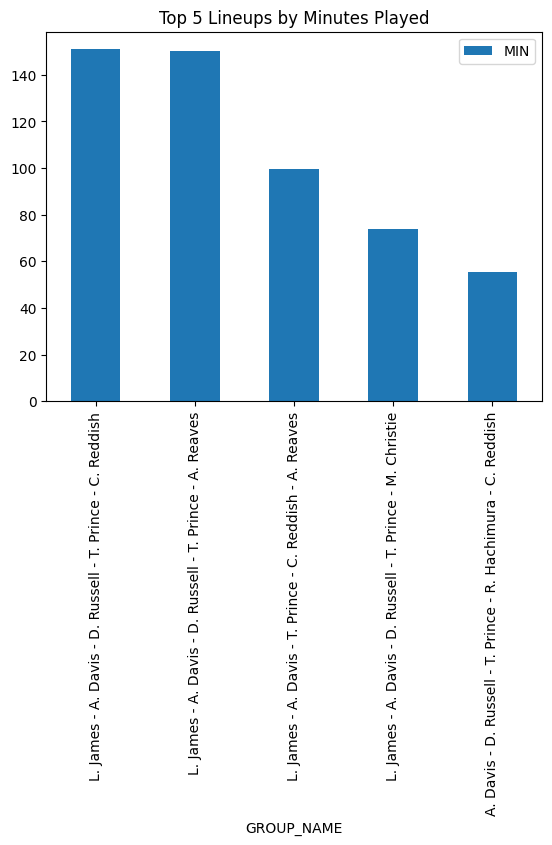

In [9]:
top_5_lineups_MIN.plot(kind='bar', x='GROUP_NAME', y='MIN', title='Top 5 Lineups by Minutes Played', rot=90)
plt.show()

Phoenix Suns 2023-24 5 Man Line Up Analysis

In [26]:
from nba_api.stats.endpoints import leaguedashlineups
from nba_api.stats.static import teams

# Set the display option to None (no limit)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# get all teams
nba_teams = teams.get_teams()
for team in nba_teams:
    print(team['full_name'], team['abbreviation'])

Atlanta Hawks ATL
Boston Celtics BOS
Cleveland Cavaliers CLE
New Orleans Pelicans NOP
Chicago Bulls CHI
Dallas Mavericks DAL
Denver Nuggets DEN
Golden State Warriors GSW
Houston Rockets HOU
Los Angeles Clippers LAC
Los Angeles Lakers LAL
Miami Heat MIA
Milwaukee Bucks MIL
Minnesota Timberwolves MIN
Brooklyn Nets BKN
New York Knicks NYK
Orlando Magic ORL
Indiana Pacers IND
Philadelphia 76ers PHI
Phoenix Suns PHX
Portland Trail Blazers POR
Sacramento Kings SAC
San Antonio Spurs SAS
Oklahoma City Thunder OKC
Toronto Raptors TOR
Utah Jazz UTA
Memphis Grizzlies MEM
Washington Wizards WAS
Detroit Pistons DET
Charlotte Hornets CHA


In [32]:
# set parameters
season_id = '2023-24'
team_id = teams.find_team_by_abbreviation('phx')['id']
measure_type = 'Advanced'

#fetch data
lineupdata = leaguedashlineups.LeagueDashLineups(team_id_nullable=team_id, season=season_id, measure_type_detailed_defense=measure_type)

lineupdata_df = lineupdata.get_data_frames()[0]

lineup_minmin_df = lineupdata_df[lineupdata_df['MIN'] > 24]
lineup_minmin_df_sorted = lineup_minmin_df.sort_values('OFF_RATING', ascending=False)
lineup_minmin_df_sorted

,GROUP_SET,GROUP_ID,GROUP_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK
1,Lineups,-201142-203078-203994-1626164-1628960-,K. Durant - B. Beal - J. Nurkic - D. Booker - G. Allen,1610612756,PHX,7,4,3,0.571,109.0,132.2,132.9,109.0,111.0,23.2,21.9,0.630,3.95,23.4,0.221,0.664,0.467,0.084,0.642,0.664,101.2,99.97,83.31,225,0.606,5,4,361,170,2,104,208,125,151,14,84,175,196,224,184,107,128,246,132
4,Lineups,-201142-201569-203994-1628960-1628966-,K. Durant - E. Gordon - J. Nurkic - G. Allen - K. Bates-Diop,1610612756,PHX,6,2,4,0.333,48.0,133.8,132.0,122.6,124.5,11.2,7.5,0.723,2.43,23.4,0.235,0.821,0.548,0.136,0.679,0.719,100.5,100.41,83.67,103,0.549,7,20,369,223,5,105,239,150,106,33,83,169,131,133,229,92,99,239,160
2,Lineups,-201142-201569-203994-1628960-1629006-,K. Durant - E. Gordon - J. Nurkic - G. Allen - J. Okogie,1610612756,PHX,11,6,5,0.545,74.0,119.9,121.9,107.9,109.2,12.0,12.7,0.681,1.68,20.6,0.323,0.769,0.546,0.175,0.606,0.652,102.8,101.34,84.45,160,0.597,2,2,374,171,3,127,202,138,119,64,103,139,147,135,259,120,134,228,141
0,Lineups,-201142-201569-203994-1626164-1628960-,K. Durant - E. Gordon - J. Nurkic - D. Booker - G. Allen,1610612756,PHX,14,11,3,0.786,140.0,119.5,121.6,99.4,99.3,20.1,22.3,0.703,2.31,23.2,0.248,0.727,0.525,0.144,0.627,0.650,100.2,99.44,82.87,292,0.628,1,1,361,142,1,128,156,123,114,35,86,167,171,148,241,109,135,249,129
8,Lineups,-201142-201569-1626164-1628960-1629234-,K. Durant - E. Gordon - D. Booker - G. Allen - D. Eubanks,1610612756,PHX,8,3,5,0.375,32.0,117.4,120.0,150.0,153.3,-32.5,-33.3,0.559,1.46,19.2,0.345,0.552,0.448,0.186,0.603,0.631,111.9,109.49,91.24,70,0.366,3,8,374,222,9,132,310,270,163,78,130,115,205,232,264,121,141,153,237
9,Lineups,-201569-203994-1626164-1628966-1629006-,E. Gordon - J. Nurkic - D. Booker - K. Bates-Diop - J. Okogie,1610612756,PHX,3,2,1,0.667,27.0,115.3,114.8,95.9,92.9,19.4,22.0,0.680,2.43,22.1,0.240,0.767,0.527,0.130,0.590,0.599,95.1,96.88,80.73,54,0.596,35,20,140,152,10,151,152,124,120,33,94,168,150,147,225,129,163,269,142
7,Lineups,-203078-203994-1626164-1628960-1629002-,B. Beal - J. Nurkic - D. Booker - G. Allen - C. Metu,1610612756,PHX,3,2,1,0.667,33.0,119.9,114.7,115.8,114.9,4.1,-0.2,0.645,2.50,21.7,0.148,0.722,0.476,0.118,0.612,0.639,94.5,96.91,80.76,68,0.529,35,20,140,152,8,152,219,210,148,31,95,196,172,220,210,116,138,268,170
6,Lineups,-201142-203078-203994-1628960-1628966-,K. Durant - B. Beal - J. Nurkic - G. Allen - K. Bates-Diop,1610612756,PHX,4,2,2,0.500,35.0,113.4,114.3,98.0,94.7,15.4,19.6,0.719,1.64,20.7,0.306,0.972,0.639,0.182,0.567,0.598,102.1,103.43,86.19,77,0.590,16,20,333,172,7,153,153,131,107,67,102,141,113,87,261,142,164,206,147
5,Lineups,-201142-203994-1626164-1628960-1629006-,K. Durant - J. Nurkic - D. Booker - G. Allen - J. Okogie,1610612756,PHX,7,5,2,0.714,42.0,107.6,113.5,102.3,103.4,5.2,10.1,0.706,1.33,18.6,0.364,0.738,0.547,0.202,0.507,0.575,104.1,100.78,83.99,89,0.575,5,3,333,151,6,155,195,142,113,79,136,112,168,134,288,159,181,234,152
3,Lineups,-201142-203994-1626164-1628960-1629642-,K. Durant - J. Nurkic - D. Booker - G. Allen - N. Little,1610612756,PHX,5,3,2,0.600,50.0,110.8,109.6,129.1,127.6,-18.3,-18.0,0.622,1.75,17.7,0.273,0.787,0.510,0.139,0.531,0.569,109.6,110.81,92.34,115,0.423,10,8,333,168,4,161,255,239,154,62,144,148,142,150,232,156,187,142,216
